# Dataset

The CIFAR-10 dataset consists of 60000 colour images (32x32) in 10 classes. Each class contains 6000 images. There are 50000 training images and 10000 test images. The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class.

In [1]:
import numpy as np            
import matplotlib.pyplot as plt  
import tensorflow as tf              
from sklearn.model_selection import train_test_split
import pandas as pd

In [2]:
# load dataset
from tensorflow.keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# shape of train and test image
print(f'Number of training and validation examples{X_train.shape}')
print(f'Number of test examples{X_test.shape}')

170508288/170498071 [==============================] - 11s 0us/step
Number of training and validation examples(50000, 32, 32, 3)
Number of test examples(10000, 32, 32, 3)


In [3]:
labels = np.unique(y_test)
print(labels)

[0 1 2 3 4 5 6 7 8 9]


In [4]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog',   'frog',   'horse',  'ship',   'truck']

# display numeric label and corresponding class name 
print('label value \t\t category')
for class_name, label in zip(class_names, labels):
    print (f'{label} \t\t {class_name}')

label value 		 category
0 		 airplane
1 		 automobile
2 		 bird
3 		 cat
4 		 deer
5 		 dog
6 		 frog
7 		 horse
8 		 ship
9 		 truck


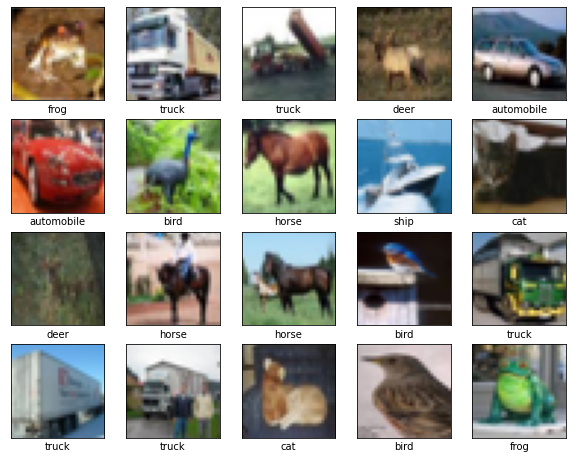

In [5]:
# print 20 sample data

plt.figure(figsize=(10,10))
i = 0
for (image, label) in zip(X_train[:20],y_train[:20]):
    plt.subplot(5,5,i+1)
    plt.xticks([]) # remove ticks on x-axis
    plt.yticks([]) # remove ticks on y-axis
    plt.imshow(image, cmap='binary') # set the colormap to 'binary' 
    plt.xlabel(class_names[int(label)])
    i += 1
plt.show()

# Standardizing the data

The data RGB channel values are in the [0, 255] range. This is not ideal for a neural network; in general we should seek to make your input values small. Here, we will standardize values to be in the [0, 1].

In [6]:
# scaling the data between 0-1
X_train=X_train/255
X_test=X_test/255

# Splitting the data into training and validation set

In [7]:
X_train,X_valid,y_train,y_valid=train_test_split(X_train,y_train,test_size=0.1,random_state=42)

In [8]:
training_set_shape = X_train.shape
print(training_set_shape)

(45000, 32, 32, 3)


# Sequential building of the layers

(A very Simple Model)

In [9]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=[32,32,3]),
    tf.keras.layers.Dense(1024,activation="relu"),
    tf.keras.layers.Dense(512,activation="relu"), 
    tf.keras.layers.Dense(10,activation="softmax")
])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 1024)              3146752   
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                                 
 dense_2 (Dense)             (None, 10)                5130      
                                                                 
Total params: 3,676,682
Trainable params: 3,676,682
Non-trainable params: 0
_________________________________________________________________


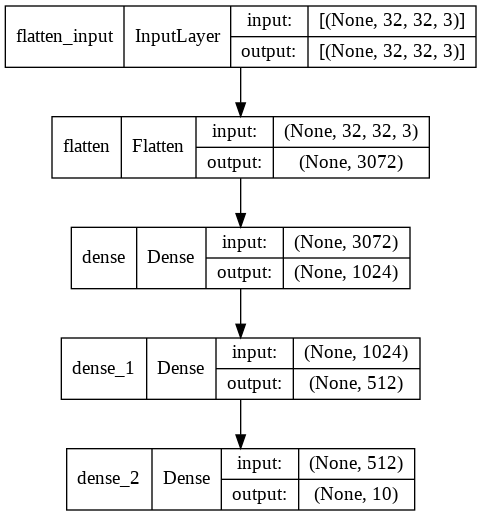

In [11]:
tf.keras.utils.plot_model(model,"cifar-10.png",show_shapes=True,show_layer_names=True)

In [12]:
# compile the model
model.compile(optimizer="sgd",loss="sparse_categorical_crossentropy",
             metrics=tf.keras.metrics.sparse_categorical_accuracy,
             )

In [13]:
history=model.fit(X_train,y_train,epochs=5,validation_data=(X_valid,y_valid))

Epoch 1/5
1407/1407 [==============================] - 35s 24ms/step - loss: 1.8532 - sparse_categorical_accuracy: 0.3377 - val_loss: 1.7969 - val_sparse_categorical_accuracy: 0.3498
Epoch 2/5
1407/1407 [==============================] - 34s 24ms/step - loss: 1.6625 - sparse_categorical_accuracy: 0.4122 - val_loss: 1.8010 - val_sparse_categorical_accuracy: 0.3478
Epoch 3/5
1407/1407 [==============================] - 34s 24ms/step - loss: 1.5803 - sparse_categorical_accuracy: 0.4429 - val_loss: 1.6508 - val_sparse_categorical_accuracy: 0.4150
Epoch 4/5
1407/1407 [==============================] - 35s 25ms/step - loss: 1.5199 - sparse_categorical_accuracy: 0.4627 - val_loss: 1.6527 - val_sparse_categorical_accuracy: 0.3974
Epoch 5/5
1407/1407 [==============================] - 34s 24ms/step - loss: 1.4763 - sparse_categorical_accuracy: 0.4810 - val_loss: 1.5441 - val_sparse_categorical_accuracy: 0.4572


Looking at the output, you can see that our network obtained 45.7% accuracy. 

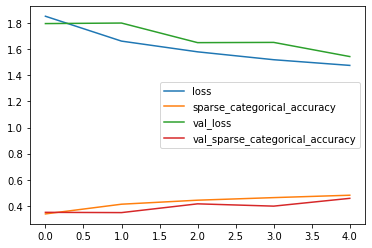

In [14]:
pd.DataFrame((history.history)).plot()

We notice the training accuracy is 48% whereas the validation accuracy is around 45.7%. Though the accuracy is not so good but still overfitting is less. Training data loss is noted to be reducing epoch after epoch. Validation data loss started dropping more or less after epoch 18. But still we observe some kinks in the plot which can be improved by taking few measures. For example changing neuron count,changing the batch size,adding regularization and dropout,etc may result in better accuracy and smoother curves.

# Evaluate on test set

In [15]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 3s 9ms/step - loss: 1.5044 - sparse_categorical_accuracy: 0.4729


[1.5043898820877075, 0.47290000319480896]

# Test on new dataset

In [16]:
model.predict(X_test[1:2])

array([[2.7506854e-02, 9.2643805e-02, 9.0476399e-04, 4.2856834e-03,
        2.1256865e-03, 5.0083006e-04, 3.6386750e-04, 1.6783626e-04,
        5.0477570e-01, 3.6672500e-01]], dtype=float32)

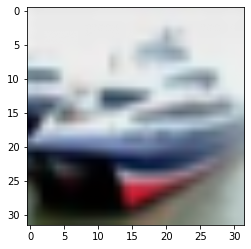

In [17]:
plt.imshow(X_test[1].reshape(32,32,3),interpolation='bilinear')

In [18]:
class_names[np.argmax(model.predict(X_test[1:2]))]

'ship'

In [19]:
model.predict(X_test[:1])

array([[0.0250572 , 0.04956851, 0.10437091, 0.3604049 , 0.04522809,
        0.24024451, 0.10696197, 0.0023008 , 0.06222327, 0.00363984]],
      dtype=float32)

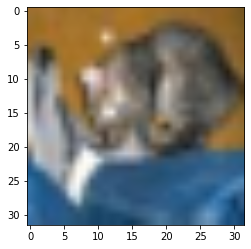

In [20]:
plt.imshow(X_test[0].reshape(32,32,3),interpolation='bilinear')

In [21]:
class_names[np.argmax(model.predict(X_test[:1]))]

'cat'

Here above we have validated two samples randomly and our model has predicted both correctly.

# He Initialization

In [22]:
# add he initialization to the model
model_he_normal=tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=[32,32,3]),
    tf.keras.layers.Dense(1024,activation="relu", kernel_initializer="he_normal"),
    tf.keras.layers.Dense(512,activation="relu", kernel_initializer="he_normal"), 
    tf.keras.layers.Dense(10,activation="softmax")
])

# compile the model
model_he_normal.compile(optimizer="sgd",loss="sparse_categorical_crossentropy",
             metrics=tf.keras.metrics.sparse_categorical_accuracy,
             )

history_he_normal=model_he_normal.fit(X_train,y_train,epochs=5,validation_data=(X_valid,y_valid))

Epoch 1/5
1407/1407 [==============================] - 33s 23ms/step - loss: 1.8384 - sparse_categorical_accuracy: 0.3445 - val_loss: 2.0644 - val_sparse_categorical_accuracy: 0.2690
Epoch 2/5
1407/1407 [==============================] - 33s 23ms/step - loss: 1.6493 - sparse_categorical_accuracy: 0.4168 - val_loss: 1.6841 - val_sparse_categorical_accuracy: 0.3942
Epoch 3/5
1407/1407 [==============================] - 34s 24ms/step - loss: 1.5683 - sparse_categorical_accuracy: 0.4457 - val_loss: 1.6241 - val_sparse_categorical_accuracy: 0.4150
Epoch 4/5
1407/1407 [==============================] - 33s 23ms/step - loss: 1.5120 - sparse_categorical_accuracy: 0.4654 - val_loss: 1.5573 - val_sparse_categorical_accuracy: 0.4374
Epoch 5/5
1407/1407 [==============================] - 33s 23ms/step - loss: 1.4635 - sparse_categorical_accuracy: 0.4838 - val_loss: 1.6369 - val_sparse_categorical_accuracy: 0.4224


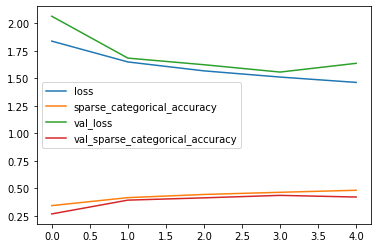

In [24]:
pd.DataFrame((history_he_normal.history)).plot()

In this model, training accuracy increased a bit, but validation accuracy decreased than before

# Apply Different Activation Function

**ReLU vs Leaky ReLU** <br>
<img src="https://i0.wp.com/androidkt.com/wp-content/uploads/2020/05/Selection_019.png?resize=760%2C364">

## Leaky ReLU

To implement this, we have to use this layer instead of Activation Function parameter : 
`tf.keras.layers.LeakyReLU(alpha = 0.1)` where `alpha` is Leak.

In [25]:
# add Leaky ReLU to the model
model_leaky_relu=tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=[32,32,3]),
    tf.keras.layers.LeakyReLU(alpha = 0.1),

    tf.keras.layers.Dense(1024, kernel_initializer="he_normal"),
    tf.keras.layers.LeakyReLU(alpha = 0.1),

    tf.keras.layers.Dense(512, kernel_initializer="he_normal"),
    tf.keras.layers.LeakyReLU(alpha = 0.1),

    tf.keras.layers.Dense(10,activation="softmax")
])


# compile the model
model_leaky_relu.compile(optimizer="sgd",loss="sparse_categorical_crossentropy",
             metrics=tf.keras.metrics.sparse_categorical_accuracy,
             )

history_leaky_relu=model_leaky_relu.fit(X_train,y_train,epochs=5,validation_data=(X_valid,y_valid))


Epoch 1/5
1407/1407 [==============================] - 41s 29ms/step - loss: 1.8389 - sparse_categorical_accuracy: 0.3461 - val_loss: 1.8486 - val_sparse_categorical_accuracy: 0.3360
Epoch 2/5
1407/1407 [==============================] - 42s 30ms/step - loss: 1.6563 - sparse_categorical_accuracy: 0.4166 - val_loss: 1.7436 - val_sparse_categorical_accuracy: 0.3826
Epoch 3/5
1407/1407 [==============================] - 43s 31ms/step - loss: 1.5776 - sparse_categorical_accuracy: 0.4461 - val_loss: 1.7774 - val_sparse_categorical_accuracy: 0.3604
Epoch 4/5
1407/1407 [==============================] - 41s 29ms/step - loss: 1.5204 - sparse_categorical_accuracy: 0.4649 - val_loss: 1.8335 - val_sparse_categorical_accuracy: 0.3420
Epoch 5/5
1407/1407 [==============================] - 34s 24ms/step - loss: 1.4755 - sparse_categorical_accuracy: 0.4809 - val_loss: 1.6550 - val_sparse_categorical_accuracy: 0.4168


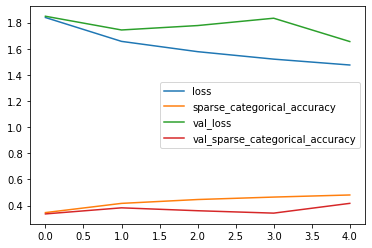

In [26]:
pd.DataFrame((history_leaky_relu.history)).plot()

Both accuracy decreased than other model

**Leaky ReLU vs PReLU** <br>
<img src="https://imgs.developpaper.com/imgs/2813863991-5e720eab30026_articlex.png">

## PReLU
To implement this, we have to use this layer instead of Activation Function parameter : `tf.keras.layers.PReLU()`

In [27]:
# add PReLU to the model
model_prelu=tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=[32,32,3]),
    tf.keras.layers.PReLU(),

    tf.keras.layers.Dense(1024, kernel_initializer="he_normal"),
    tf.keras.layers.PReLU(),

    tf.keras.layers.Dense(512, kernel_initializer="he_normal"),
    tf.keras.layers.PReLU(),

    tf.keras.layers.Dense(10,activation="softmax")
])


# compile the model
model_prelu.compile(optimizer="sgd",loss="sparse_categorical_crossentropy",
             metrics=tf.keras.metrics.sparse_categorical_accuracy,
             )

history_prelu=model_prelu.fit(X_train,y_train,epochs=5,validation_data=(X_valid,y_valid))


Epoch 1/5
1407/1407 [==============================] - 54s 38ms/step - loss: 1.8377 - sparse_categorical_accuracy: 0.3452 - val_loss: 1.8013 - val_sparse_categorical_accuracy: 0.3520
Epoch 2/5
1407/1407 [==============================] - 55s 39ms/step - loss: 1.6553 - sparse_categorical_accuracy: 0.4132 - val_loss: 1.7043 - val_sparse_categorical_accuracy: 0.3868
Epoch 3/5
1407/1407 [==============================] - 55s 39ms/step - loss: 1.5726 - sparse_categorical_accuracy: 0.4466 - val_loss: 1.9936 - val_sparse_categorical_accuracy: 0.3122
Epoch 4/5
1407/1407 [==============================] - 55s 39ms/step - loss: 1.5123 - sparse_categorical_accuracy: 0.4683 - val_loss: 1.5607 - val_sparse_categorical_accuracy: 0.4382
Epoch 5/5
1407/1407 [==============================] - 54s 38ms/step - loss: 1.4630 - sparse_categorical_accuracy: 0.4862 - val_loss: 1.5552 - val_sparse_categorical_accuracy: 0.4410


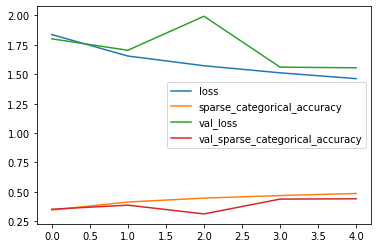

In [28]:
pd.DataFrame((history_prelu.history)).plot()

Training accuracy increased a bit, and validation accuracy increase significantly

## ELU

<img src="https://360digit.b-cdn.net/assets/admin/ckfinder/userfiles/images/blog/elu.png">

To implement this, we have to use this layer instead of Activation Function parameter : `tf.keras.layers.ELU()`

In [29]:
# add ELU to the model
model_elu=tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=[32,32,3]),
    tf.keras.layers.ELU(),

    tf.keras.layers.Dense(1024, kernel_initializer="he_normal"),
    tf.keras.layers.ELU(),

    tf.keras.layers.Dense(512, kernel_initializer="he_normal"),
    tf.keras.layers.ELU(),

    tf.keras.layers.Dense(10,activation="softmax")
])


# compile the model
model_elu.compile(optimizer="sgd",loss="sparse_categorical_crossentropy",
             metrics=tf.keras.metrics.sparse_categorical_accuracy,
             )

history_elu=model_elu.fit(X_train,y_train,epochs=5,validation_data=(X_valid,y_valid))


Epoch 1/5
1407/1407 [==============================] - 35s 24ms/step - loss: 1.8875 - sparse_categorical_accuracy: 0.3292 - val_loss: 1.7871 - val_sparse_categorical_accuracy: 0.3508
Epoch 2/5
1407/1407 [==============================] - 34s 24ms/step - loss: 1.6856 - sparse_categorical_accuracy: 0.4024 - val_loss: 1.9472 - val_sparse_categorical_accuracy: 0.3128
Epoch 3/5
1407/1407 [==============================] - 34s 24ms/step - loss: 1.6051 - sparse_categorical_accuracy: 0.4328 - val_loss: 1.7034 - val_sparse_categorical_accuracy: 0.3960
Epoch 4/5
1407/1407 [==============================] - 35s 25ms/step - loss: 1.5533 - sparse_categorical_accuracy: 0.4516 - val_loss: 1.7418 - val_sparse_categorical_accuracy: 0.3712
Epoch 5/5
1407/1407 [==============================] - 36s 25ms/step - loss: 1.5138 - sparse_categorical_accuracy: 0.4668 - val_loss: 1.6519 - val_sparse_categorical_accuracy: 0.4188


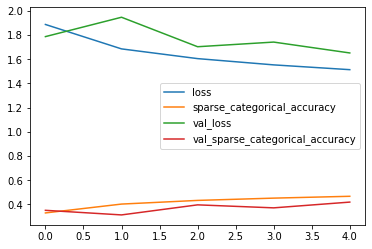

In [30]:
pd.DataFrame((history_elu.history)).plot()

Elu will not be a good activation function for this dataset

## SeLU

To implement this, we have to use this layer instead of Activation Function parameter : `activation="selu"`

In [31]:
# add SeLU to the model
model_selu=tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=[32,32,3]),
    tf.keras.layers.Dense(1024,activation="selu"),
    tf.keras.layers.Dense(512,activation="selu"), 
    tf.keras.layers.Dense(10,activation="softmax")
])


# compile the model
model_selu.compile(optimizer="sgd",loss="sparse_categorical_crossentropy",
             metrics=tf.keras.metrics.sparse_categorical_accuracy,
             )

history_selu=model_selu.fit(X_train,y_train,epochs=5,validation_data=(X_valid,y_valid))


Epoch 1/5
1407/1407 [==============================] - 35s 25ms/step - loss: 2.0419 - sparse_categorical_accuracy: 0.3105 - val_loss: 2.0319 - val_sparse_categorical_accuracy: 0.2692
Epoch 2/5
1407/1407 [==============================] - 34s 24ms/step - loss: 1.7027 - sparse_categorical_accuracy: 0.3931 - val_loss: 1.9403 - val_sparse_categorical_accuracy: 0.3138
Epoch 3/5
1407/1407 [==============================] - 33s 24ms/step - loss: 1.6160 - sparse_categorical_accuracy: 0.4248 - val_loss: 1.7919 - val_sparse_categorical_accuracy: 0.3716
Epoch 4/5
1407/1407 [==============================] - 33s 24ms/step - loss: 1.5638 - sparse_categorical_accuracy: 0.4444 - val_loss: 1.6484 - val_sparse_categorical_accuracy: 0.4032
Epoch 5/5
1407/1407 [==============================] - 34s 24ms/step - loss: 1.5155 - sparse_categorical_accuracy: 0.4614 - val_loss: 1.7006 - val_sparse_categorical_accuracy: 0.3878


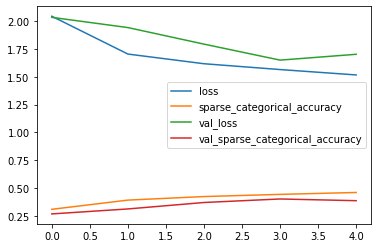

In [32]:
pd.DataFrame((history_selu.history)).plot()

We can see a clear indication of overfitting here. 

## SeLU with "lecun_normal"

In [33]:
# add SeLU with Lecun_Normal to the model
model_selu_normal=tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=[32,32,3]),
    tf.keras.layers.Dense(1024,activation="selu",kernel_initializer="lecun_normal"),
    tf.keras.layers.Dense(512,activation="selu",kernel_initializer="lecun_normal"), 
    tf.keras.layers.Dense(10,activation="softmax")
])


# compile the model
model_selu_normal.compile(optimizer="sgd",loss="sparse_categorical_crossentropy",
             metrics=tf.keras.metrics.sparse_categorical_accuracy,
             )

history_selu_normal=model_selu_normal.fit(X_train,y_train,epochs=5,validation_data=(X_valid,y_valid))


Epoch 1/5
1407/1407 [==============================] - 36s 25ms/step - loss: 2.0076 - sparse_categorical_accuracy: 0.3108 - val_loss: 1.9287 - val_sparse_categorical_accuracy: 0.3062
Epoch 2/5
1407/1407 [==============================] - 34s 24ms/step - loss: 1.7182 - sparse_categorical_accuracy: 0.3890 - val_loss: 2.0194 - val_sparse_categorical_accuracy: 0.2904
Epoch 3/5
1407/1407 [==============================] - 34s 24ms/step - loss: 1.6365 - sparse_categorical_accuracy: 0.4212 - val_loss: 1.6797 - val_sparse_categorical_accuracy: 0.3944
Epoch 4/5
1407/1407 [==============================] - 35s 25ms/step - loss: 1.5839 - sparse_categorical_accuracy: 0.4379 - val_loss: 1.6741 - val_sparse_categorical_accuracy: 0.3874
Epoch 5/5
1407/1407 [==============================] - 34s 24ms/step - loss: 1.5429 - sparse_categorical_accuracy: 0.4537 - val_loss: 1.7788 - val_sparse_categorical_accuracy: 0.3776


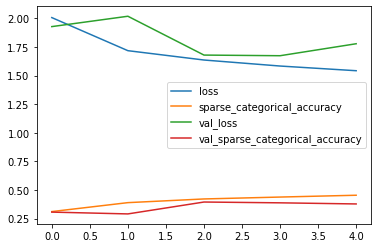

In [34]:
pd.DataFrame((history_selu_normal.history)).plot()

Almost same like SeLU

# Batch Normalization

# Neuer Abschnitt

<img src="https://images.deepai.org/glossary-terms/981e1ffea3814ae193c27461253faf63/batch_normalization.png">


To implement this, we have to simply use this `layer tf.keras.layers.batch_normalization()`. We can apply BN Layer before activation function or even after activation function.

In [35]:
# add BN to the model
model_bn=tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=[32,32,3]),
    tf.keras.layers.BatchNormalization(),

    tf.keras.layers.Dense(1024,activation="relu",kernel_initializer="he_normal"),
    tf.keras.layers.BatchNormalization(),

    tf.keras.layers.Dense(512,activation="relu",kernel_initializer="he_normal"), 
    tf.keras.layers.BatchNormalization(),

    tf.keras.layers.Dense(10,activation="softmax")
])


# compile the model
model_bn.compile(optimizer="sgd",loss="sparse_categorical_crossentropy",
             metrics=tf.keras.metrics.sparse_categorical_accuracy,
             )

history_bn=model_bn.fit(X_train,y_train,epochs=5,validation_data=(X_valid,y_valid))

Epoch 1/5
1407/1407 [==============================] - 57s 40ms/step - loss: 1.7242 - sparse_categorical_accuracy: 0.4016 - val_loss: 1.5409 - val_sparse_categorical_accuracy: 0.4640
Epoch 2/5
1407/1407 [==============================] - 57s 40ms/step - loss: 1.4233 - sparse_categorical_accuracy: 0.5002 - val_loss: 1.4853 - val_sparse_categorical_accuracy: 0.4750
Epoch 3/5
1407/1407 [==============================] - 56s 40ms/step - loss: 1.3072 - sparse_categorical_accuracy: 0.5421 - val_loss: 1.4333 - val_sparse_categorical_accuracy: 0.4988
Epoch 4/5
1407/1407 [==============================] - 56s 40ms/step - loss: 1.2120 - sparse_categorical_accuracy: 0.5737 - val_loss: 1.4344 - val_sparse_categorical_accuracy: 0.5056
Epoch 5/5
1407/1407 [==============================] - 56s 40ms/step - loss: 1.1338 - sparse_categorical_accuracy: 0.6021 - val_loss: 1.4591 - val_sparse_categorical_accuracy: 0.4998


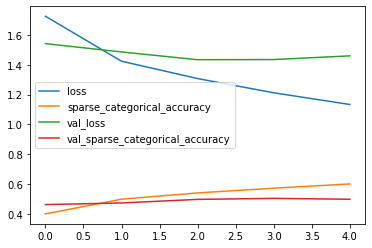

In [36]:
pd.DataFrame((history_bn.history)).plot()

Training accuracy and validation accuracy increased significantly 

# Cyclic Learning rate

Cyclical Learning Rates take a different approach. Using CLRs, we now:

- Define a minimum learning rate
- Define a maximum learning rate
- Allow the learning rate to cyclically oscillate between the two bounds

In practice, using Cyclical Learning Rates leads to faster convergence and with fewer experiments/hyperparameter updates.

<img src="https://www.pyimagesearch.com/wp-content/uploads/2019/07/keras_clr_learning_rate_variations.png">

In [38]:
!pip install tensorflow_addons

     |████████████████████████████████| 1.1 MB 4.3 MB/s 


In [39]:
import tensorflow_addons as tfa
lr=tfa.optimizers.CyclicalLearningRate(initial_learning_rate=1e-5,
                                       maximal_learning_rate=1e-2,
                                       step_size=1500,
                                       scale_fn=lambda x:1
                                       )

In [41]:
optimizer=tf.keras.optimizers.Adam(lr)

In [42]:
# add Cyclic learning rate to the model
model_cyclic_lr=tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=[32,32,3]),
    tf.keras.layers.BatchNormalization(),

    tf.keras.layers.Dense(1024,activation="relu",kernel_initializer="he_normal"),
    tf.keras.layers.BatchNormalization(),

    tf.keras.layers.Dense(512,activation="relu",kernel_initializer="he_normal"), 
    tf.keras.layers.BatchNormalization(),

    tf.keras.layers.Dense(10,activation="softmax")
])


# compile the model
model_cyclic_lr.compile(optimizer=optimizer,loss="sparse_categorical_crossentropy",
             metrics=tf.keras.metrics.sparse_categorical_accuracy,
             )

history_cyclic_lr=model_cyclic_lr.fit(X_train,y_train,epochs=5,validation_data=(X_valid,y_valid))

Epoch 1/5
1407/1407 [==============================] - 65s 46ms/step - loss: 1.8861 - sparse_categorical_accuracy: 0.3549 - val_loss: 1.6301 - val_sparse_categorical_accuracy: 0.4194
Epoch 2/5
1407/1407 [==============================] - 66s 47ms/step - loss: 1.5042 - sparse_categorical_accuracy: 0.4631 - val_loss: 1.3660 - val_sparse_categorical_accuracy: 0.5098
Epoch 3/5
1407/1407 [==============================] - 64s 46ms/step - loss: 1.3993 - sparse_categorical_accuracy: 0.5017 - val_loss: 1.5057 - val_sparse_categorical_accuracy: 0.4618
Epoch 4/5
1407/1407 [==============================] - 63s 44ms/step - loss: 1.4639 - sparse_categorical_accuracy: 0.4785 - val_loss: 1.3571 - val_sparse_categorical_accuracy: 0.5122
Epoch 5/5
1407/1407 [==============================] - 63s 45ms/step - loss: 1.2948 - sparse_categorical_accuracy: 0.5378 - val_loss: 1.4807 - val_sparse_categorical_accuracy: 0.4744


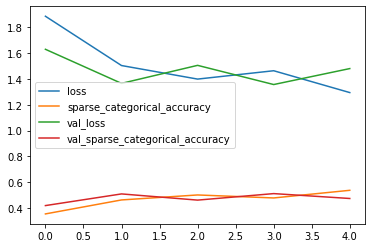

In [43]:
pd.DataFrame((history_cyclic_lr.history)).plot()

We can see a very interesting pattern here :p

# Create Tensorboard